# Exploratory Data Analysis (EDA)

---

We are going to look at two types of data: one on SAT scores by state, and one on drug use by age.
---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

## 1. Loading the `sat_scores.csv` dataset and describing it

---

In [3]:
sat = pd.read_csv('sat_scores.csv')

In [4]:
sat.head() # displaying the header of the dataset

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


Take a look at the `.dtypes` attribute in the DataFrame. 

In [5]:
sat.dtypes
# all the columns are interger type objects

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### 1.2 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
sat.head(10)
# the data describes the completion rate, Verbal Scores and Math scores.

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


## 2. Creating a "data dictionary" based on the data

---

In [7]:
#State - State name associated with each standardized test
#Rate - Participation rate for each state on the standardized test
#Verbal - Verbal score associated with the SAT for each state
#Math - Mathematical score associated with the SAT for each state.

## 3. Plotting the data using seaborn

---

### 3.1 Using seaborn's `distplot`, we will plot the distributions for each of `Rate`, `Math`, and `Verbal`

We're going to set the keyword argument `kde=False`. This way we can actually see the counts within bins. We can adjust the number of bins to our liking. 

Text(0.5,1,'Distribution of Completion Rate')

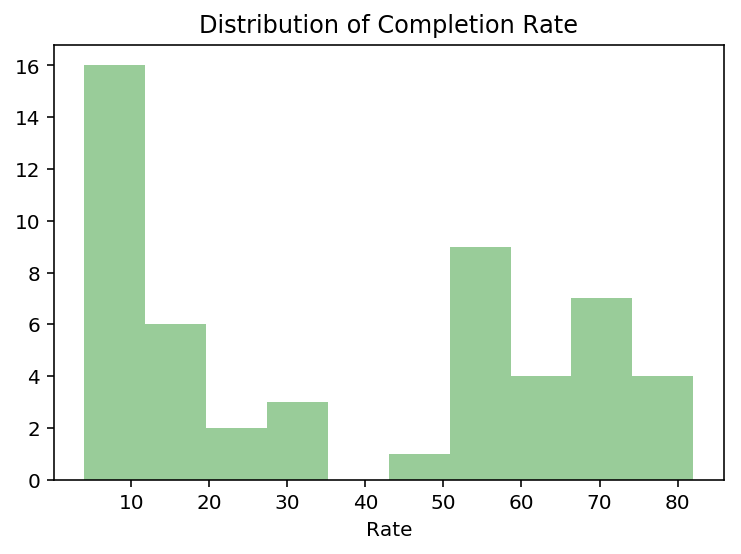

In [8]:
ax1 = sns.distplot(sat['Rate'], bins=10, kde=False, color='green')
ax1.set_title('Distribution of Completion Rate')
# Plotting a distribution of completion rate

Text(0.5,1,'Distribution of Verbal Scores')

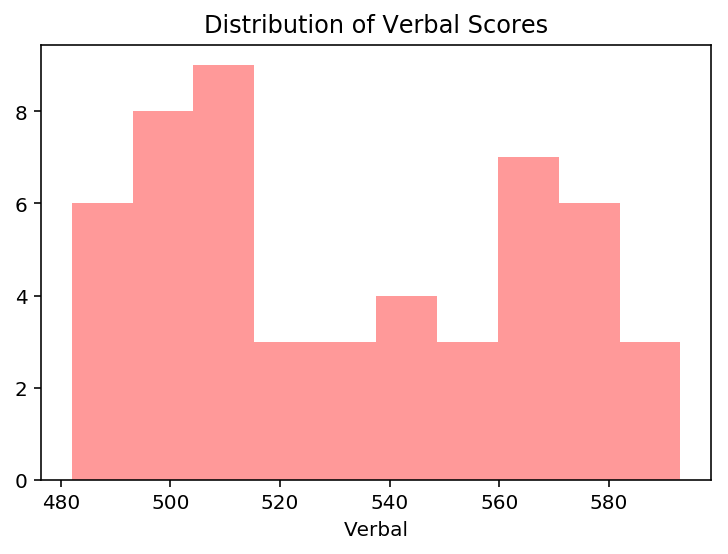

In [9]:
ax2 = sns.distplot(sat['Verbal'], bins=10, kde=False, color='red')
ax2.set_title('Distribution of Verbal Scores')
# plotting a distribution of verbal scores

Text(0.5,1,'Distribution of Math Scores')

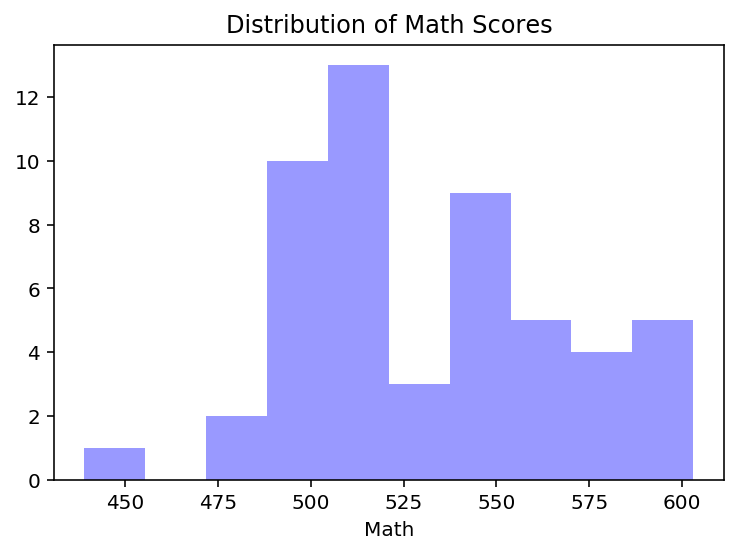

In [10]:
ax3 = sns.distplot(sat['Math'], bins=10, kde=False, color='blue')
ax3.set_title('Distribution of Math Scores')
# plotting distribution of math scores

### 3.2 Using seaborn's `pairplot` to show the joint distributions for each of `Rate`, `Math`, and `Verbal`


[Reference notes](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

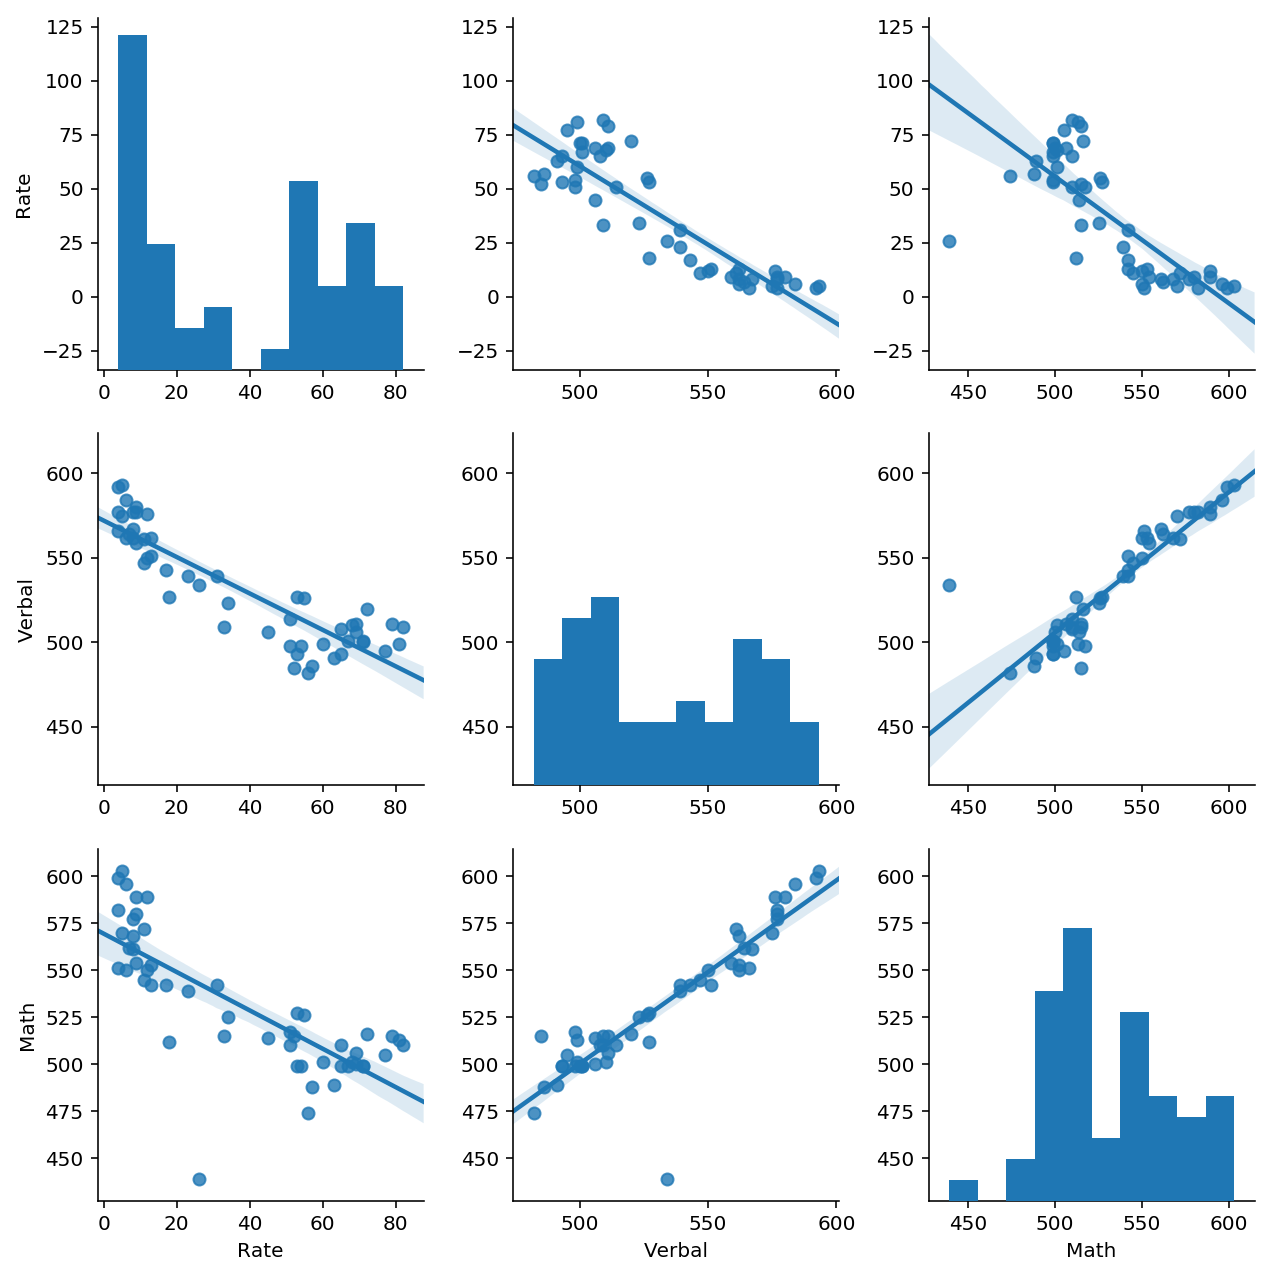

In [11]:
sns.pairplot(sat, size=3, kind='reg')
# from this we can see that as Math scores go up, verbal scores go up as well so there is a positive correlation
# As participation rates go down, so does verbal scores so there is a negative correlation
# as participation rates go down, so does math scores so there is a negative correlation.

## 4. Plotting the data using built-in pandas functions.


### 4.1 Plotting a stacked histogram with `Verbal` and `Math` using pandas

In [12]:
sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [13]:
sat_mv = sat.loc[:, ['Verbal', 'Math']]
sat_mv.head() 
# spliced the verbal and math to create it's own dataframe

,Verbal,Math
0,509,510
1,499,513
2,511,515
3,495,505
4,520,516


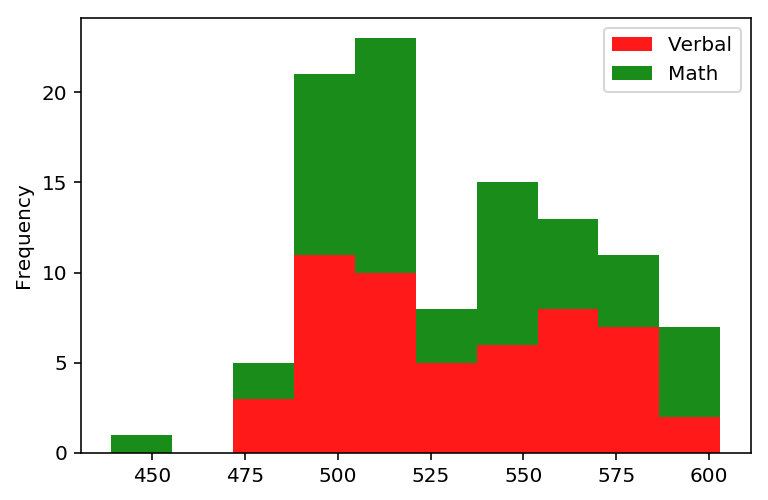

In [14]:
sat_mv.plot.hist(stacked=True, alpha=0.9, color=['r', 'g'])
# Plotted the stacked distribution of Math and verbal scores and it looks like Math scores are siginicaly higher

### 4.2 Plotting `Verbal` and `Math` on the same chart using boxplots

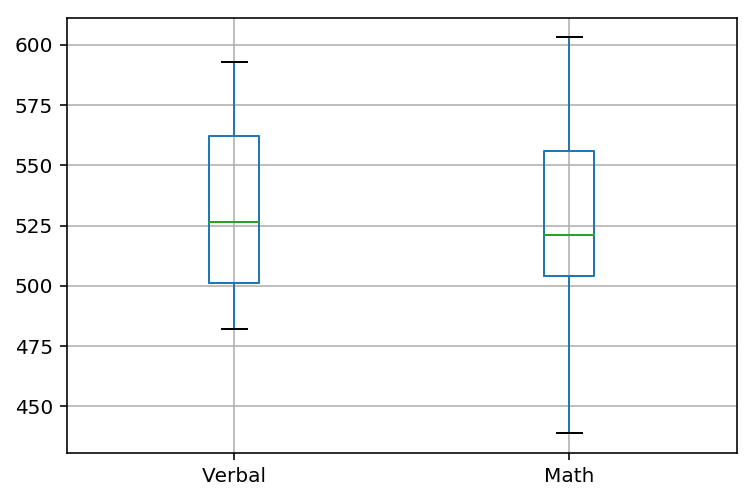

In [15]:
sat_mv.boxplot(figsize=(6,4), grid=True)
plt.show()
# the benefits of a boxplot is that it shows the upper quartile, lower quartile, extreme outliers on both ends, which paints a good picture of descriptive statistics
# Because Rate is a percentage and portrays an inaccurate description of numerical scores for boxplot purposes

### 4.3 Plotting `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Text(0.5,1,'Box plot for Verbal, Math and Rate')

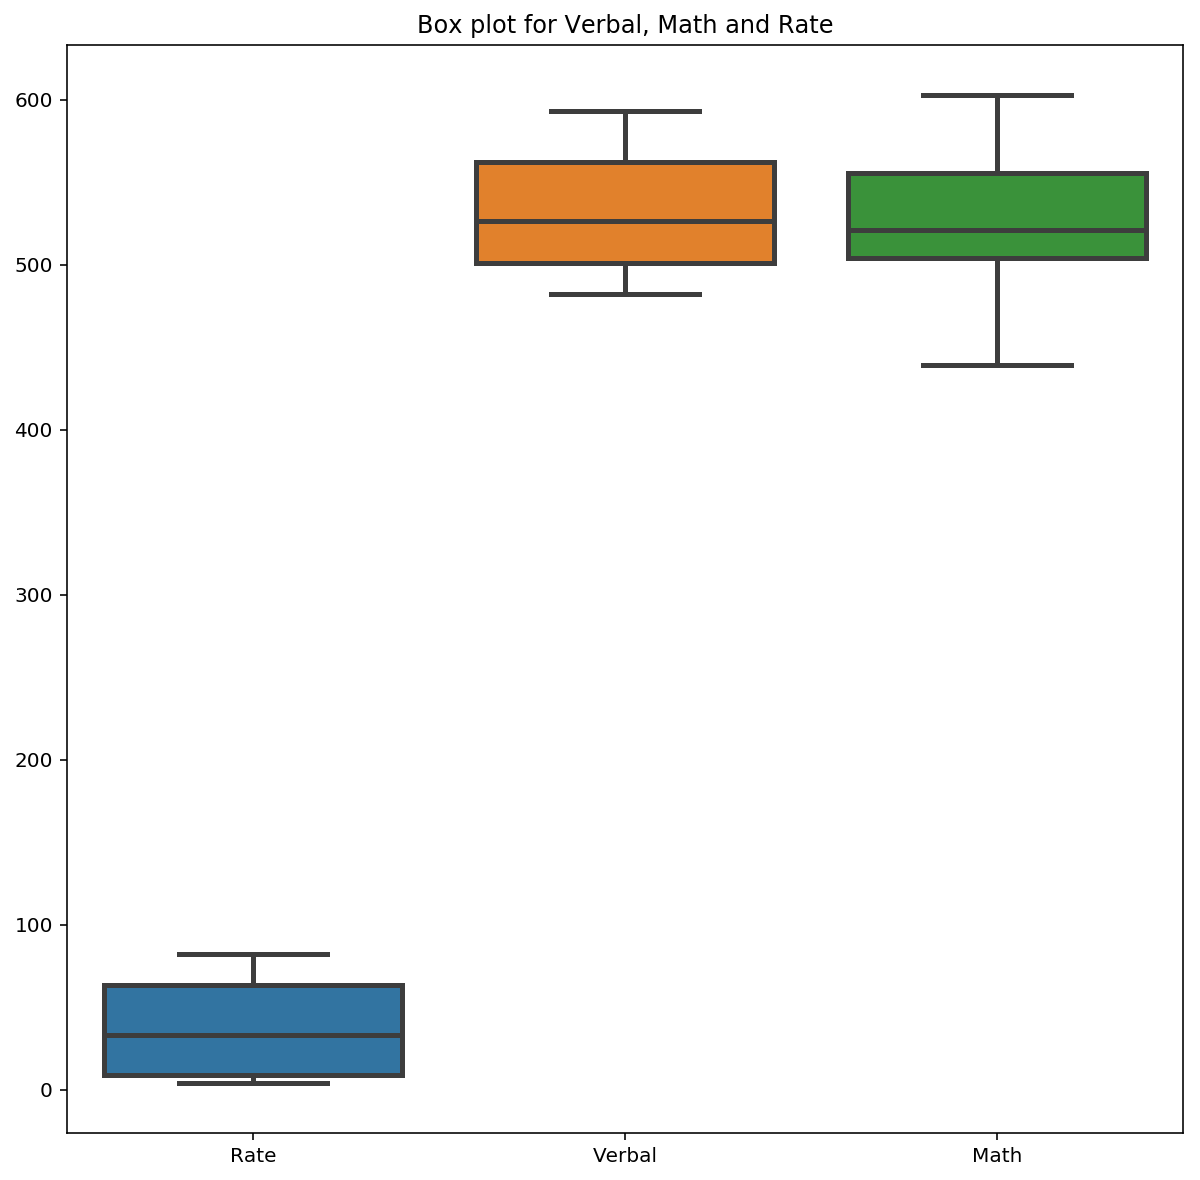

In [16]:
plt.figure(figsize=(10,10))
sns.boxplot(data=sat , whis=1.5, linewidth=2.5)
plt.title('Box plot for Verbal, Math and Rate')

## 5. Creating and examining subsets of the data

---

### 5.1 Finding the list of states that have an average `Verbal` score greater than the average of `Verbal` scores across the entire dataset

How many states are above the mean? What does this tell about the distribution of `Verbal` scores?




In [17]:
sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [18]:
rate_mean = sat['Rate'].mean() # calculated the overall mean for each of the columns: rate, verbal, and math
verbal_mean = sat['Verbal'].mean()
math_mean = sat['Math'].mean()
print(rate_mean)
print(verbal_mean)
print(math_mean)

37.15384615384615
532.0192307692307
531.5


In [18]:
state_mean_Verbal = sat[sat['Verbal'] > verbal_mean] #Created a new dataframe to show the states that
#have higher verbal scores than the overall verbal mean
state_mean_Verbal

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.2 Finding the list of states that have a median `Verbal` score greater than the median of `Verbal` scores across the entire dataset


In [19]:
verbal_median = sat['Verbal'].median() # created a variable for the verbal median score
verbal_median

526.5

In [20]:
state_median_verbal = sat[sat['Verbal'] > verbal_median] # Created a dataframe to identify the states with higher verbal scores than the median
state_median_verbal.head()

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512


### 5.3 Creating a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [21]:
sat['V-M'] = sat['Verbal'] - sat['Math'] # took the difference between two columns on the SAT Verbal and Math scores to create a new colum
sat[['V-M']]
sat.head()

,State,Rate,Verbal,Math,V-M
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Creating two new DataFrames showing states with the greatest difference between scores

1. The first DataFrame will be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`.

In [22]:
top_verbal = sat.sort_values(['V-M'], ascending=False) # sorted the states by top ascending values where Verbal had a positive inference
top_verbal_states = top_verbal[:10][:] # spliced the top 10 states with higher verbal scores than math
top_verbal_states

,State,Rate,Verbal,Math,V-M
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
32,NM,13,551,542,9
31,TN,13,562,553,9
9,VA,68,510,501,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [23]:
top_verbal_states.head(3) # Display the top 3 states

,State,Rate,Verbal,Math,V-M
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [24]:
bottom_verbal = sat.sort_values(['V-M'], ascending=True) # sort the verbal scores from worst showing up first 
bottom_verbal_states = bottom_verbal[:10][:] # spliced the bottom 10 states with lower verbal scores than math
bottom_verbal_states.head(3) # displays the bottom 3 states in verbal scores compared to math

,State,Rate,Verbal,Math,V-M
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examining summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Creating a correlation matrix of variables (excluding `State`).

In [25]:
sat.describe()

,Rate,Verbal,Math,V-M
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


In [26]:
corr_state = sat[['Rate', 'Verbal', 'Math']].corr() 
# created a corrleation variable for the "Rate", 'Math', and 'Verbal' columns

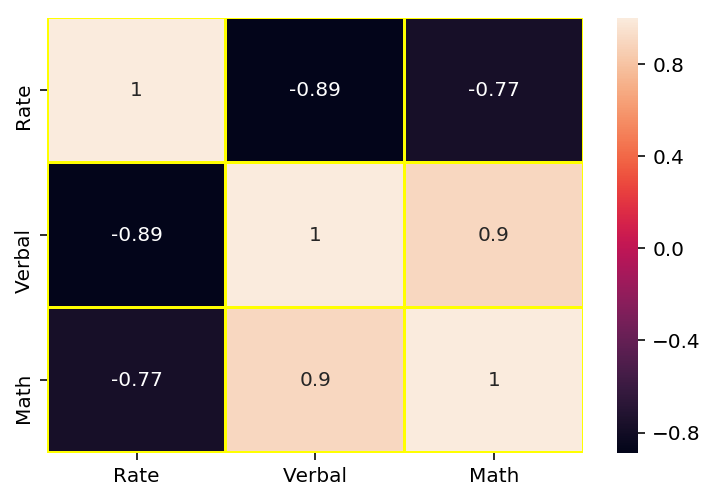

In [27]:
sat_heatmap = sns.heatmap(corr_state, annot=True, linewidths=1, linecolor='yellow') 
# Plotted heatmap of correlation between math, verbal, and rate. Verbal and Math scores are highly correlated but don't 

### 6.2 Using pandas'  `.describe()` built-in function on your DataFrame

In [28]:
sat.describe()
# Count highlights the number of values in each of the columns
# Mean is the average value of all the values summed together divided by N, also known as the sample size
# Standard deviation is the square root of the variance 
# the min is the lowest value identified in that column
# the 25% quartile is the first quartile which spits out the middle number between the smallest number and the median
# the 50% quartile is the 2nd quartile which spits out the median
# the 75% quartile or the 3rd quartile which spits out the middle number between the largest number and the median

,Rate,Verbal,Math,V-M
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


### 6.3 Assigning and printing the _covariance_ matrix for the dataset

In [24]:
sat[['Verbal', 'Math']].cov()
# Correlation is scaled to be between -1 and +1 depending on whether there is positive or negative correlation, and is dimensionless
# you could calculate correlation from covariance by taking the covariance of two variables and dividing it by the sample standard deviation of variable X mulitplied by the sample standard deviation of variable y'''
# The covariance however, ranges from zero, in the case of two independent variables, to Var(X), in the case where the two sets of data are equal

,Verbal,Math
Verbal,1104.646682,1077.147059
Math,1077.147059,1297.078431


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

Now I'll switch datasets to one with many more variables. 

Begin by working with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Loading the data using pandas. Perform the following steps:
- cleaning
- missing values
- EDA
- Visualization

In [25]:
drugs = pd.read_csv('drug-use-by-age.csv')
drugs.head(30) # imported the drugs dataset and displayed the first 30 rows to understand what we're looking at
# it does require some cleaning as there '-'values in some of the columns

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [26]:
drugs['cocaine-frequency'].replace('-', np.NaN, inplace=True)
drugs['crack-frequency'].replace('-', np.NaN, inplace=True)
drugs['heroin-frequency'].replace('-', np.NaN, inplace=True)
drugs['inhalant-frequency'].replace('-', np.NaN, inplace=True)
drugs['oxycontin-frequency'].replace('-', np.NaN, inplace=True)
drugs['meth-frequency'].replace('-', np.NaN, inplace=True)
# replaced all the columns with '-' values with null values so they're not displayed as strings

In [27]:
drugs.head() # displayed the head to ensure the null values are displaying

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [28]:
drugs.info() # used this method to identify which columns are nuull values and which aren't. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null object
crack-use                  17 non-null float64
crack-frequency            14 non-null object
heroin-use                 17 non-null float64
heroin-frequency           16 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

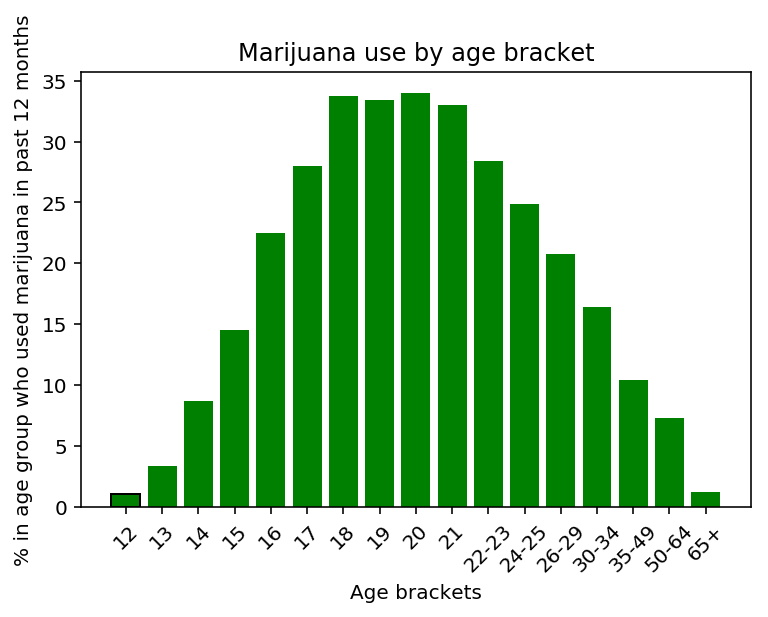

In [29]:

m_age = drugs.groupby('age')[['marijuana-use']].mean() # grouped marijuana use by age
age = m_age.index.values # obtain the age brackets using the index method and assign to variable 
m_use = m_age['marijuana-use'] # value for marijuana use
y_pos = np.arange(len(age)) # identify length of x label

plt.bar(y_pos, m_use, color='green', edgecolor='black')
plt.title('Marijuana use by age bracket')
plt.xlabel('Age brackets')
plt.ylabel('% in age group who used marijuana in past 12 months')
plt.xticks(y_pos, age, rotation=45)
plt.show() # this graph displays the marijuana use among all the all the age groups/brackets


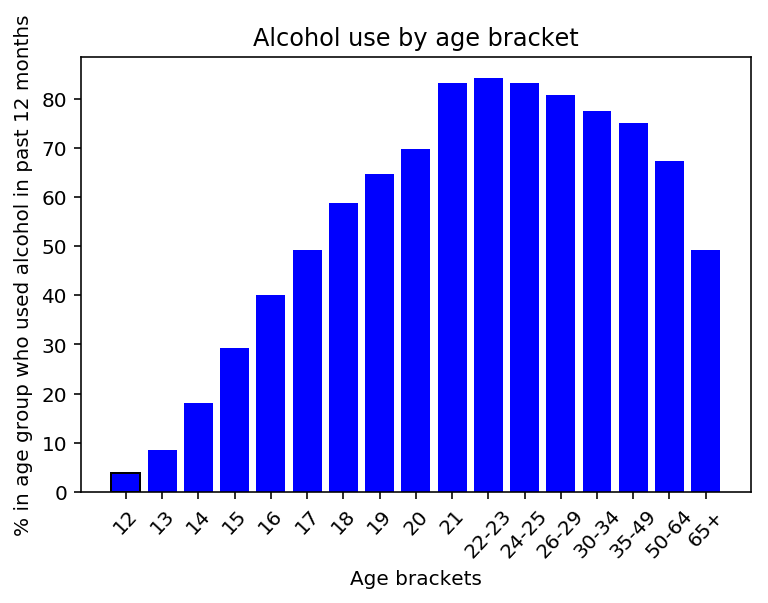

In [30]:
a_age = drugs.groupby('age')[['alcohol-use']].mean()
age = a_age.index.values
a_use = a_age['alcohol-use']
y_pos = np.arange(len(age))

plt.bar(y_pos, a_use, width=0.8, color='blue', edgecolor='black')
plt.title('Alcohol use by age bracket')
plt.xlabel('Age brackets')
plt.ylabel('% in age group who used alcohol in past 12 months')
plt.xticks(y_pos, age, rotation=47)
plt.show() # same was done for alcohol use

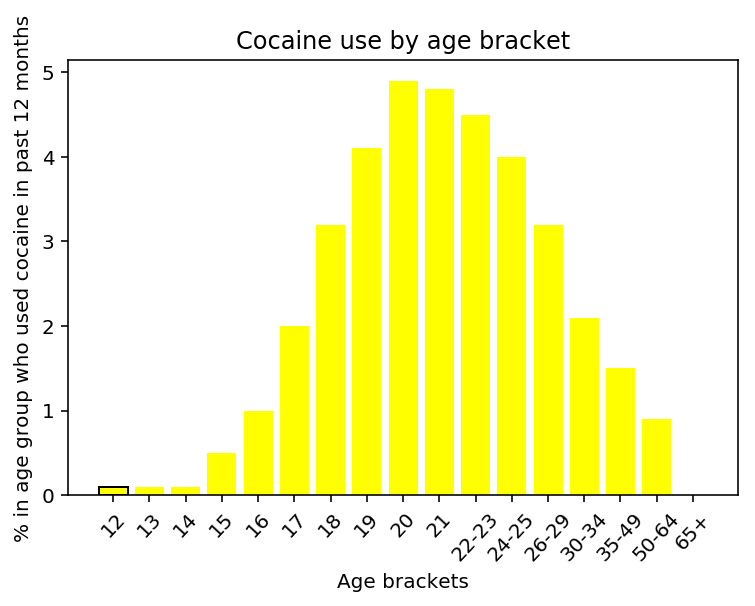

In [31]:
c_age = drugs.groupby('age')[['cocaine-use']].mean()
age = c_age.index.values
c_use = c_age['cocaine-use']
y_pos = np.arange(len(age))

plt.bar(y_pos, c_use, width=0.8, color='yellow',edgecolor='black')
plt.title('Cocaine use by age bracket')
plt.xlabel('Age brackets')
plt.ylabel('% in age group who used cocaine in past 12 months')
plt.xticks(y_pos, age, rotation=47)
plt.show() # same graph was done for concaine use among the different age brackets

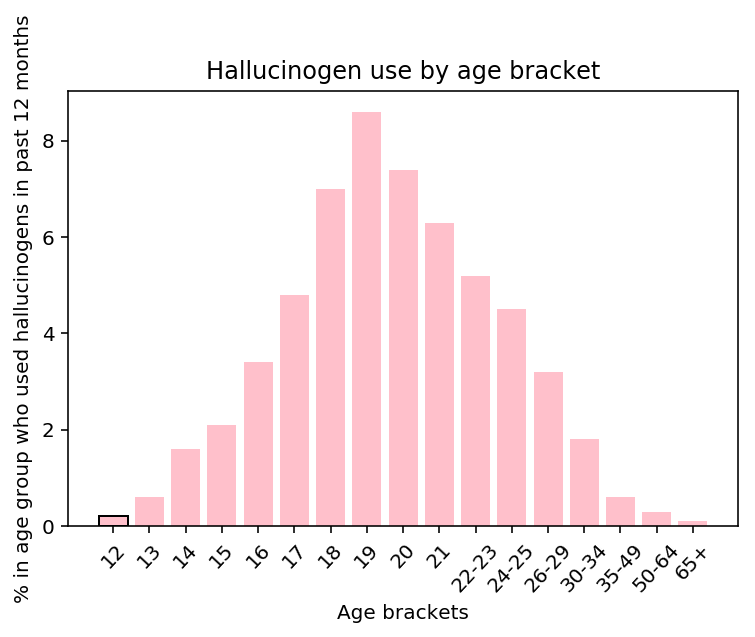

In [32]:
h_age = drugs.groupby('age')[['hallucinogen-use']].mean()
age = h_age.index.values
h_use = h_age['hallucinogen-use']
y_pos = np.arange(len(age))

plt.bar(y_pos, h_use, width=0.8, color='pink',edgecolor='black')
plt.title('Hallucinogen use by age bracket')
plt.xlabel('Age brackets')
plt.ylabel('% in age group who used hallucinogens in past 12 months')
plt.xticks(y_pos, age, rotation=47)
plt.show() # same graph methods were employed for hallucinogen use among the different age groups

In [33]:
drugs['alcohol_users'] = (drugs['alcohol-use']/100) * drugs['n']
drugs['marijuana_users'] = (drugs['marijuana-use']/100) * drugs['n']
drugs['heroin_users'] = (drugs['heroin-use']/100) * drugs['n']
drugs['oxycontin_users'] = (drugs['oxycontin-use']/100) * drugs['n']
drugs.head(20)
# created four separate columns to identify the # number of specific drug users within each sample size of users
# as seen from all these distributions, marijuana the widest bell curve in that most age brackets from teenage years all the way the 30s have heavy to mid heavy marijuana use.
# Alcohol has a negative skew meaning thhat there is heavy alcohol use even into the later years of adulthood.
# Cocaine use follows more of a normal distribution while hallucinogenic use has a normal distribution but has a steep increase from 18 up and starts decreasing steeply by the early 20s.

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,alcohol_users,marijuana_users,heroin_users,oxycontin_users
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.2,2.0,0.0,NaN,0.2,13.0,109.122,30.778,2.798,2.798
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.3,4.0,0.1,5.0,0.1,19.0,234.345,93.738,0.000,2.757
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,...,0.8,12.0,0.1,24.0,0.2,16.5,505.352,242.904,2.792,11.168
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,1.5,6.0,0.3,10.5,0.4,30.0,863.152,428.620,5.912,23.648
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.8,9.5,0.3,36.0,0.2,3.0,1226.258,688.050,3.058,33.638
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,2.8,9.0,0.6,48.0,0.5,6.5,1497.734,850.640,3.038,42.532
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,3.0,8.0,0.5,12.0,0.4,10.0,1449.303,832.053,9.876,41.973
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,3.3,6.0,0.4,105.0,0.3,6.0,1436.058,742.482,11.115,33.345
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,4.0,12.0,0.9,12.0,0.5,4.0,1582.887,772.140,20.439,38.607
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,4.1,10.0,0.6,2.0,0.3,9.0,1958.528,776.820,14.124,30.602


### 7.2 Doing a high-level, initial overview of the data

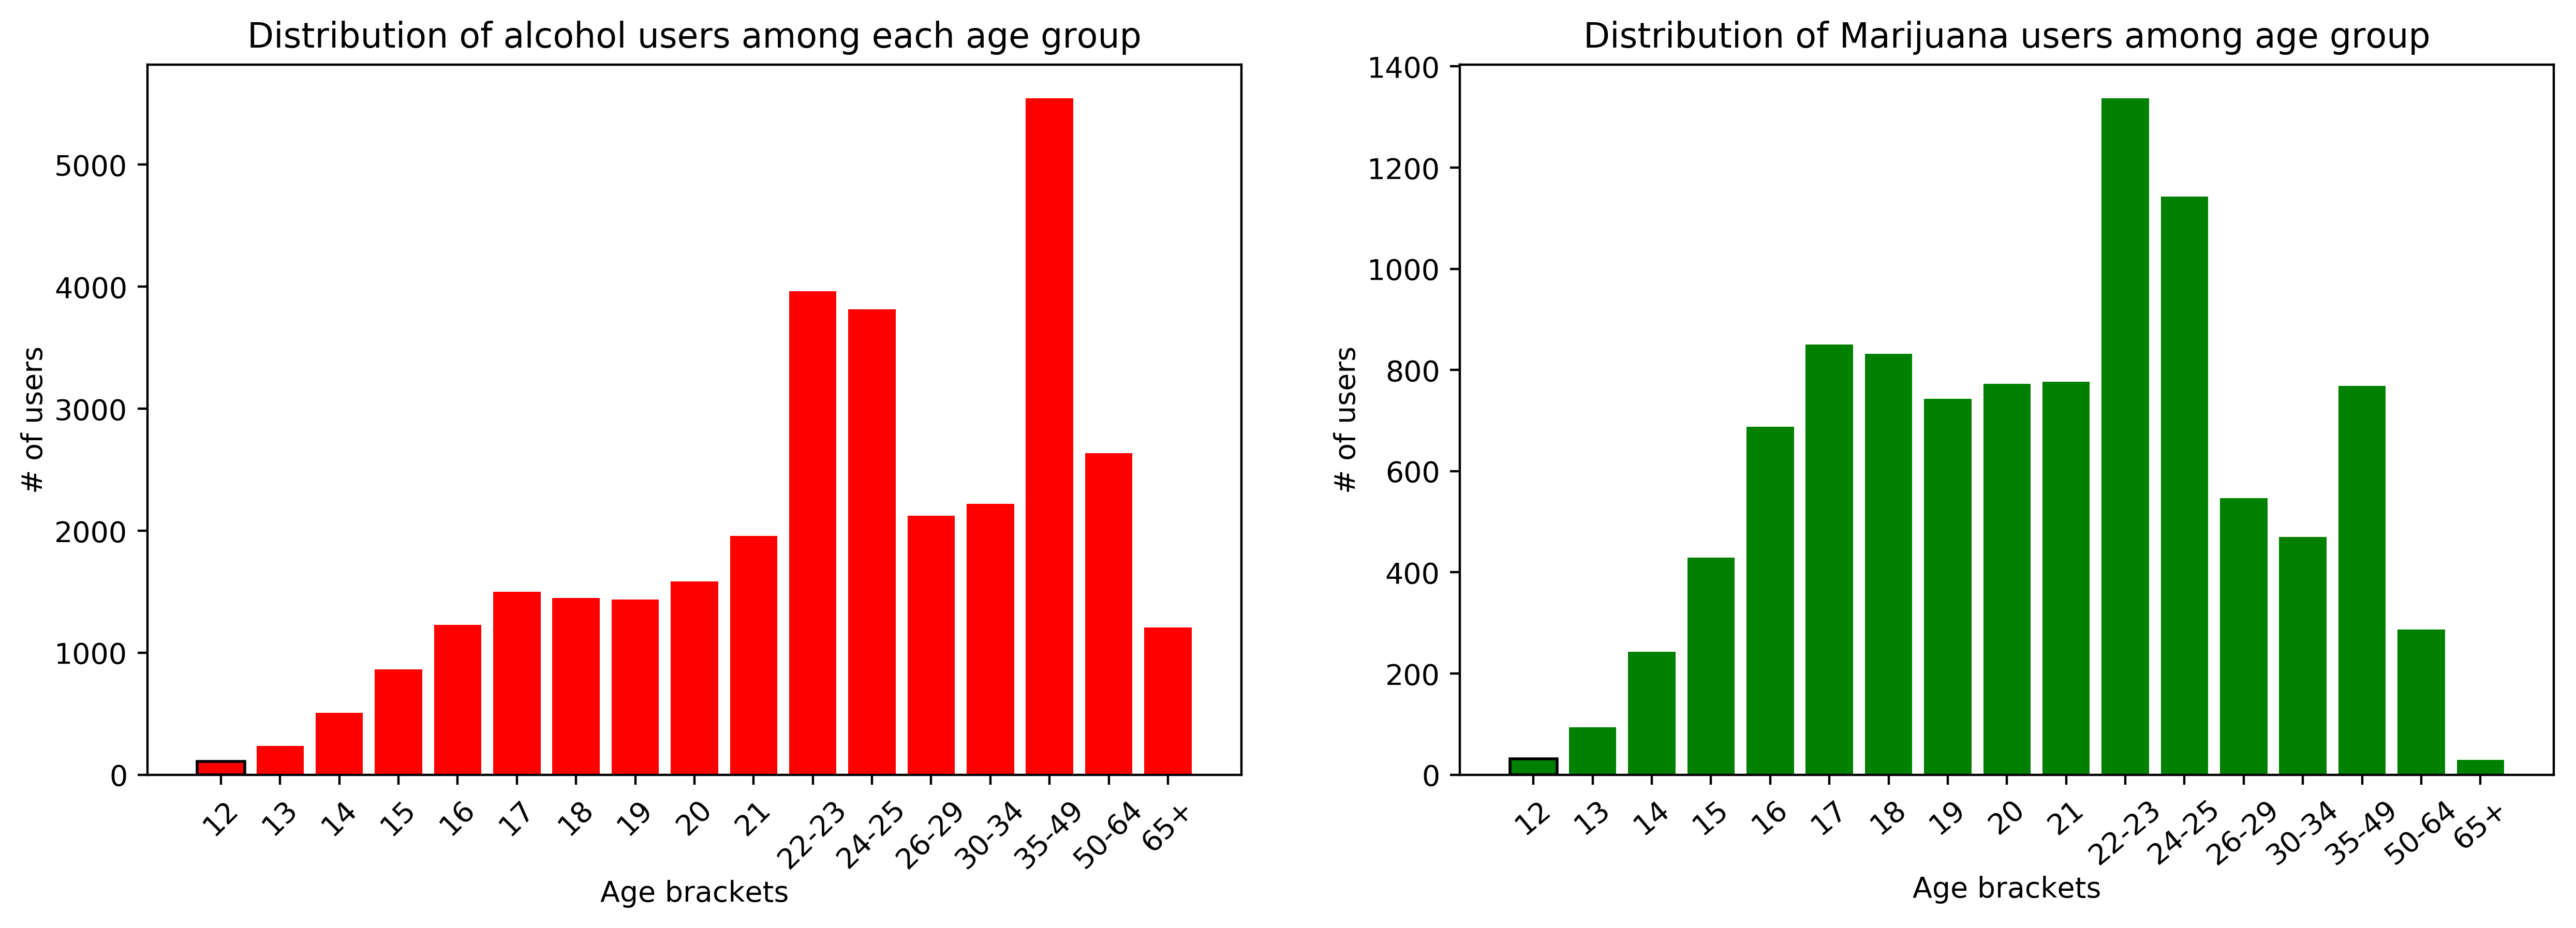

In [34]:
aa_age = drugs.groupby('age')[['alcohol_users']].mean()
age_alc = aa_age.index.values
a_users = aa_age['alcohol_users']
y_pos_a = np.arange(len(age_alc))

mm_age = drugs.groupby('age')[['marijuana_users']].mean()
age_mm = mm_age.index.values
m_users = mm_age['marijuana_users']
y_pos_m = np.arange(len(age))

fig = plt.figure(figsize=(15,10), dpi=200)

ax1 = fig.add_subplot(2,2,1)
ax1.set_title('Distribution of alcohol users among each age group')
ax1.set_xlabel('Age brackets', labelpad=2.0)
ax1.set_ylabel('# of users', labelpad=2.0)
ax1.bar(y_pos_a, a_users, width=0.8, color='red', edgecolor='black')
ax1.set_xticklabels(age_alc, rotation=45)
ax1.set_xticks(y_pos_a)

ax2 = fig.add_subplot(2,2,2)
ax2.set_title('Distribution of Marijuana users among age group')
ax2.set_xlabel('Age brackets', labelpad=2.0)
ax2.set_ylabel('# of users', labelpad=2.0)
ax2.bar(y_pos_m, m_users, width=0.8, color='green', edgecolor='black')
ax2.set_xticklabels(age_mm, rotation=40)
ax2.set_xticks(y_pos_m)

plt.show()

fig.savefig('plot.png') # created a distribution of alcohol users and marijuana users in a histogram plot to show that 
# marijuana has a more wider distribution of users across
# all age brackets

In [36]:
drugs.info()
# viewing which features have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 32 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null object
crack-use                  17 non-null float64
crack-frequency            14 non-null object
heroin-use                 17 non-null float64
heroin-frequency           16 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [37]:
corr_drugs = drugs[['alcohol-use', 'alcohol-frequency', 'marijuana-use', 'marijuana-frequency', 
                    'heroin-use', 'heroin-frequency', 'oxycontin-use', 'oxycontin-frequency', ]].corr()
# created a correlation coefficient value between alcohol, heroin, marijuana, and oxycontin use/frequency.

Text(0.5,1,'Correlation between Marijuana, Alcohol, Oxycontin, and Heroin Use')

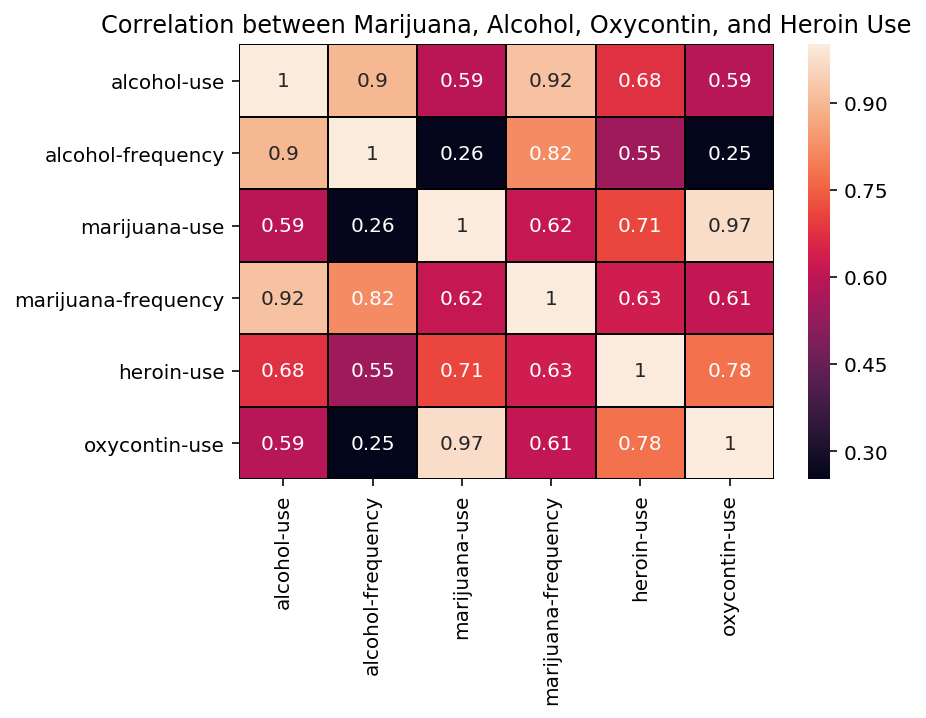

In [38]:
heatmap = sns.heatmap(corr_drugs, annot=True, linewidth=0.5, linecolor='black')

heatmap.set_title('Correlation between Marijuana, Alcohol, Oxycontin, and Heroin Use')
# the heatmap shows that there is high correlation especially between oxycontin and heroin use.

### 7.3 Creating a testable hypothesis about this data and use EDA test hypothesis

In [40]:
# H0 - There is no correlation between Oxycontin Use and Heroin use
# HA = There is a correlation between Oxcytontin use and Heroin use


# I would like to see if there is a strong correlation between oxycontin users and heroin users?

,heroin-use,oxycontin-use
heroin-use,1.000000,0.775321
oxycontin-use,0.775321,1.000000


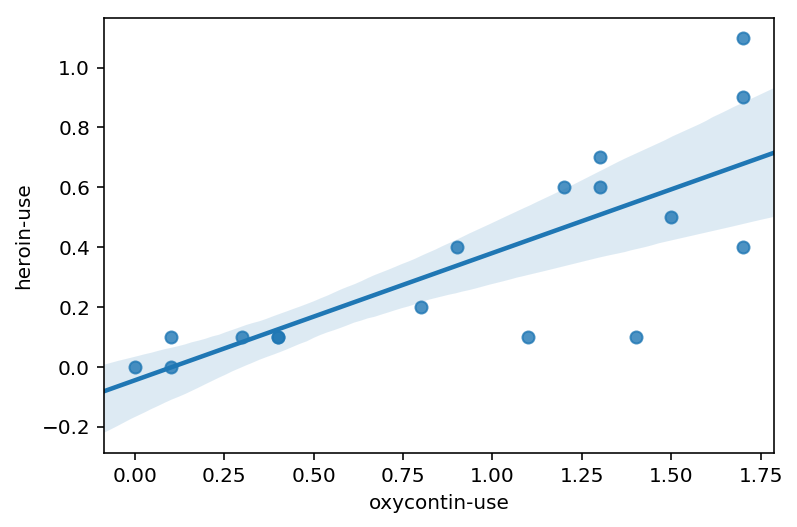

In [41]:
ax0 = sns.regplot('oxycontin-use', 'heroin-use', data=drugs, scatter=True)

corr_ho = drugs[['heroin-use', 'heroin-frequency', 'oxycontin-use', 'oxycontin-frequency']].corr()

corr_ho.head()
# plotted a scatter plot to show the view of the data points between use and frequency of oxycontin and heroin with a correlation of 0.77

In [42]:
drugs.head()
experimental = drugs['heroin_users']
control = drugs['oxycontin_users'] # converted the heroin and oxycontin users into two variable to identify the p value

In [43]:
t_stat, pvalue = stats.ttest_ind(experimental, control)
print(t_stat)
print(pvalue)
# the p value is identifying close 0.05 which mean i can fail to reject the null hypothesis as the probability correlation is due to random error is small
# This means there is a strong correlation between heroin and oxycontin users

-2.96546355121
0.00567230049129


Text(0.5,1,'Distribution of Oxy and Heroin users')

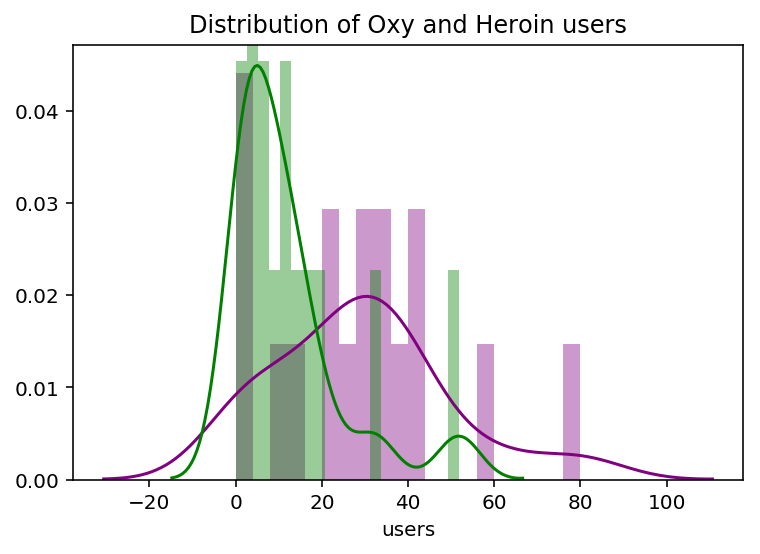

In [44]:
ax1 = sns.distplot(drugs['oxycontin_users'], bins=20, color = 'purple')
ax1 = sns.distplot(drugs['heroin_users'], bins=20, color='green')
ax1.set_xlabel('users')
ax1.set_title('Distribution of Oxy and Heroin users')


# plotted the oxycontin and heroin users on the same distribution.

## 8. Viewing the outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them.

1. Pull out the rate variable from the SAT dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [45]:
sat_rate = sat[['Rate']]
sat_verbal = sat[['Verbal']]
sat_math = sat[['Math']]
sat_rate.describe()
# created separate dataframes for each of the values in verbal, math, and rate

,Rate
count,52.000000
mean,37.153846
std,27.301788
min,4.000000
25%,9.000000
50%,33.500000
75%,63.500000
max,82.000000


In [46]:
sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [47]:
sat_rate.sort_values(['Rate'], ascending=False).head(15) 
# used the describe method and it looks like there isn't any outliers in the rate column

,Rate
0,82
1,81
2,79
3,77
4,72
5,71
6,71
7,69
8,69
9,68


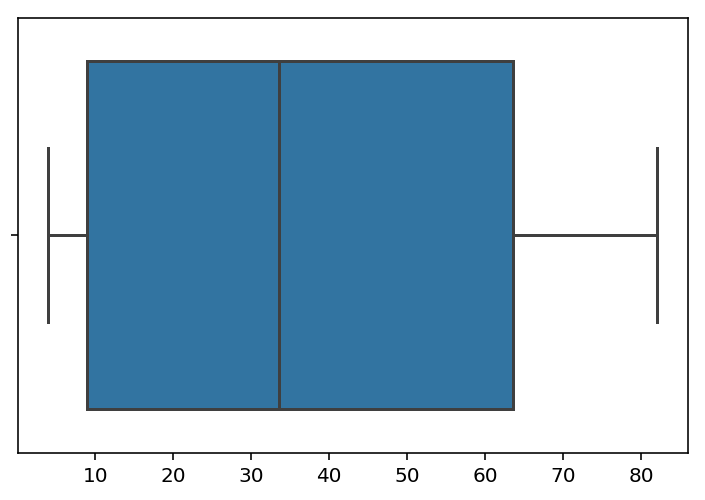

In [48]:
sns.boxplot(sat_rate, showfliers=True) 
# displayed boxplots to see if there were any outliers as well.

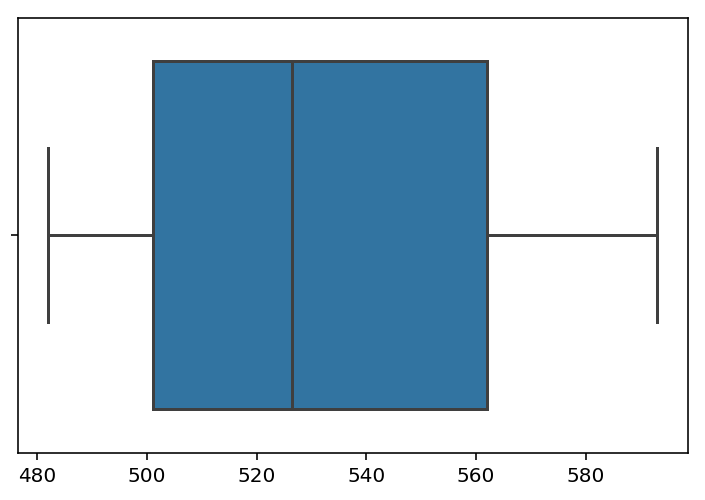

In [49]:
sns.boxplot(sat_verbal, showfliers=True)

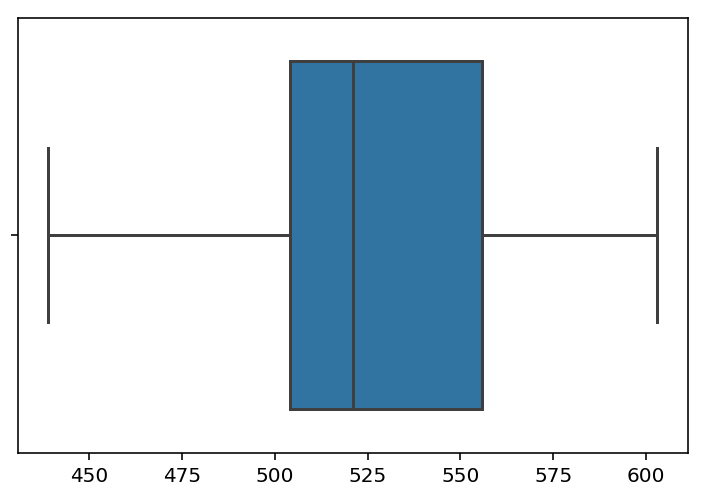

In [50]:
sns.boxplot(sat_math, showfliers=True)

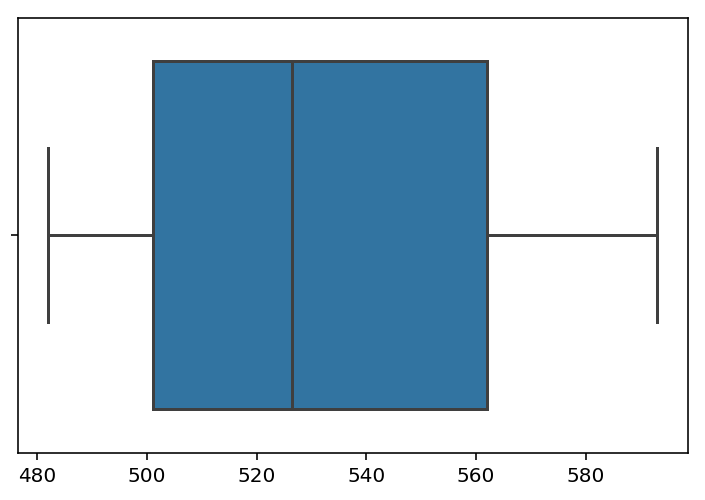

In [51]:
sns.boxplot(sat_verbal, showfliers=True)

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculating the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Defining process of calculating the spearman rank correlation.


In [52]:
# the pearson correlation is calculated using the relationship between two continuous variables.
# the spearman correlation is calculated based on the ranked values for each variable rather than raw data involving ordinal variables.
# To calculate the spearman correlation you would have to rank each piece of data you're examining so the 
# lowest valuue would be '1' and the highest value would be '5' if there are 5 data poits in that set.
# Next you would find the difference between the ranks in the two data sets you're examining and square the difference 
# afterwards we sum all the squared differences ad multiply it by 6. This will be our numerator
# the denominator is n(n**2 -1) where n is the sample size. this is the denominator and so we take the numerator 
# divided by the denominator and subtrat this from 1 to get the spearman correlation

In [53]:
stats.spearmanr(sat_verbal, sat_math)
# our correlation is 0.9 which is really so there is a strong correlation between math and verbal scores

SpearmanrResult(correlation=0.90520488479402839, pvalue=3.2352319597775181e-20)

### 9.2 Percentile scoring

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.

In [54]:
stats.percentileofscore(sat['Rate'], 76)


92.307692307692307